In [1]:
from __future__ import print_function
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.constraints import max_norm
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np



shIndex=pd.read_csv("C:/Users/yang/Downloads/shIndex.csv")
timeLen=5 #如果分析周期为11，前10个交易日预测下一个交易日
pos=0
X=np.zeros((len(shIndex['Close'])-timeLen,timeLen,1),dtype=np.float)
Y=np.zeros((len(shIndex['Close'])-timeLen),dtype=np.float)
while pos<len(shIndex['Close'])-timeLen:
    Y[pos]=shIndex['Close'][pos+timeLen]
    for j in range(0,timeLen):
        X[pos,j,0]=shIndex['Close'][pos:pos+timeLen][j+pos]
        #X[pos,j,1]=shIndex['ChgPct'][pos:pos+timeLen][j+pos]
        #X[pos,j,2]=shIndex['TurnoverValue'][pos:pos+timeLen][j+pos]
        #X[pos,j,3]=shIndex['TurnoverVol'][pos:pos+timeLen][j+pos]
    pos=pos+1 
    
#X[np.isnan(X[...,1])]=np.mean(X[~np.isnan(X[...,1])])
min_max_scaler=MinMaxScaler()
X[...,0]=min_max_scaler.fit_transform(X[...,0])
#X[...,1]=min_max_scaler.fit_transform(X[...,1])
#X[...,2]=min_max_scaler.fit_transform(X[...,2])
#X[...,3]=min_max_scaler.fit_transform(X[...,3])
Y = min_max_scaler.fit_transform(Y.reshape(-1,1))


model = Sequential()
model.add(LSTM(120,input_dim=1,stateful=False,return_sequences=False,kernel_initializer='random_uniform'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("tanh"))
model.compile(loss="mse", optimizer="Adam")
model.fit(X,Y,epochs=200,batch_size=80,validation_split=0.1)
Y=min_max_scaler.inverse_transform(Y)
Y_pred=min_max_scaler.inverse_transform(model.predict(X))


C:\Users\yang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\yang\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\yang\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(120, stateful=False, return_sequences=False, kernel_initializer="random_uniform", input_shape=(None, 1))`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 976 samples, validate on 109 samples
Epoch 1/200
976/976 [==============================] - 1s 855us/step - loss: 0.0533 - val_loss: 0.0176
Epoch 2/200
976/976 [==============================] - 0s 83us/step - loss: 0.0158 - val_loss: 0.0031
Epoch 3/200
976/976 [==============================] - 0s 78us/step - loss: 0.0098 - val_loss: 0.0058
Epoch 4/200
976/976 [==============================] - 0s 78us/step - loss: 0.0051 - val_loss: 6.1677e-04
Epoch 5/200
976/976 [==============================] - 0s 83us/step - loss: 0.0022 - val_loss: 0.0012
Epoch 6/200
976/976 [==============================] - 0s 76us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 7/200
976/976 [==============================] - 0s 77us/step - loss: 0.0020 - val_loss: 7.7432e-04
Epoch 8/200
976/976 [==============================] - 0s 78us/step 

976/976 [==============================] - 0s 82us/step - loss: 8.7370e-04 - val_loss: 4.9995e-04
Epoch 72/200
976/976 [==============================] - 0s 80us/step - loss: 9.5053e-04 - val_loss: 5.2977e-04
Epoch 73/200
976/976 [==============================] - 0s 80us/step - loss: 8.1744e-04 - val_loss: 3.5449e-04
Epoch 74/200
976/976 [==============================] - 0s 79us/step - loss: 9.0717e-04 - val_loss: 3.4247e-04
Epoch 75/200
976/976 [==============================] - 0s 77us/step - loss: 9.2438e-04 - val_loss: 3.9675e-04
Epoch 76/200
976/976 [==============================] - 0s 77us/step - loss: 7.9900e-04 - val_loss: 3.7255e-04
Epoch 77/200
976/976 [==============================] - 0s 76us/step - loss: 8.5924e-04 - val_loss: 3.6698e-04
Epoch 78/200
976/976 [==============================] - 0s 78us/step - loss: 8.1667e-04 - val_loss: 3.2050e-04
Epoch 79/200
976/976 [==============================] - 0s 76us/step - loss: 7.9914e-04 - val_loss: 3.2800e-04
Epoch 80/200
9

976/976 [==============================] - 0s 84us/step - loss: 7.2033e-04 - val_loss: 3.0603e-04
Epoch 145/200
976/976 [==============================] - 0s 78us/step - loss: 7.6895e-04 - val_loss: 3.3194e-04
Epoch 146/200
976/976 [==============================] - 0s 81us/step - loss: 8.3672e-04 - val_loss: 3.5863e-04
Epoch 147/200
976/976 [==============================] - 0s 83us/step - loss: 8.1943e-04 - val_loss: 4.3489e-04
Epoch 148/200
976/976 [==============================] - 0s 84us/step - loss: 7.0881e-04 - val_loss: 3.1775e-04
Epoch 149/200
976/976 [==============================] - 0s 86us/step - loss: 8.1207e-04 - val_loss: 2.8520e-04
Epoch 150/200
976/976 [==============================] - 0s 82us/step - loss: 7.4575e-04 - val_loss: 3.6572e-04
Epoch 151/200
976/976 [==============================] - 0s 81us/step - loss: 8.2360e-04 - val_loss: 3.3315e-04
Epoch 152/200
976/976 [==============================] - 0s 77us/step - loss: 7.4437e-04 - val_loss: 3.0365e-04
Epoch 

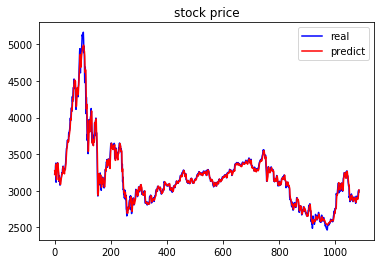

In [2]:
plt.figure()
plt.title("stock price")
plt.plot(Y,'b',label='real')
plt.plot(Y_pred,'r',label='predict')
plt.legend()
plt.show()

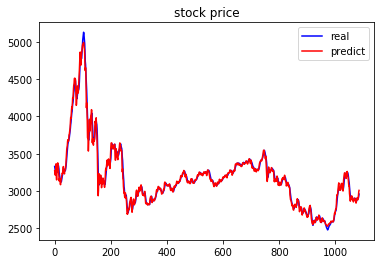

In [3]:
ma5=np.mean(X,axis=1)
ma5=min_max_scaler.inverse_transform(ma5)
plt.figure()
plt.title("stock price")
plt.plot(ma5,'b',label='real')
plt.plot(Y_pred,'r',label='predict')
plt.legend()
plt.show()